In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/Deepfold2


In [3]:
from Bio import AlignIO
import seaborn as sns
sns.set()
import pandas as pd

/dev/shm/shibinbin/anaconda2/lib/python2.7/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 2] No such file or directory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


In [4]:
alignment = AlignIO.read(open("output/TE/Spitale_2015_invitro.mm10/TE_transcript_separate.hmmalign/U1.sto"), 
                         "stockholm")
print("Alignment length %i" % alignment.get_alignment_length())
records = {record.id:str(record.seq) for record in alignment}
print('Number of alignments: %d'%len(records))

Alignment length 167
Number of alignments: 8


In [6]:
rep_table = pd.read_table('data/UCSC/mm10/RepeatMasker.classes.txt',
                          header=None, names=['repName', 'repClass', 'repFamily'])
print 'Number of repeat names: ', rep_table.shape[0]
print 'Repeat classes: ', ','.join(rep_table['repClass'].unique())
print 'Repeat families: ', ','.join(rep_table['repFamily'].unique())
rep_table.head()

Number of repeat names:  1562
Repeat classes:  scRNA,rRNA,RNA,srpRNA,Simple_repeat,SINE,Low_complexity,DNA,LTR,Other,Satellite,LINE,Unknown,DNA?,RC,RC?,LTR?,SINE?,tRNA,snRNA,LINE?
Repeat families:  scRNA,rRNA,RNA,srpRNA,Simple_repeat,Deu,Low_complexity,hAT-Tip100,Alu,B2,B4,ERVK,hAT-Blackjack,Other,Satellite,centr,hAT-Charlie,CR1,Y-chromosome,TcMar,ERVL,DNA?,DNA,Unknown,TcMar?,L1,hAT?,Helitron,Helitron?,ERV1,ID,TcMar-Tc2,L2,RTE-X,tRNA,PiggyBac,ERV1?,Gypsy,LTR,ERVL?,Gypsy?,TcMar-Mariner,Dong-R4,LTR?,TcMar-Tigger,hAT-Tip100?,hAT,SINE?,TcMar-Pogo,MIR,ERVL-MaLR,MuDR,MULE-MuDR,ERVK?,snRNA,Penelope?,PiggyBac?,RTE-BovB,L1?


,repName,repClass,repFamily
0,4.5SRNA,scRNA,scRNA
1,5S,rRNA,rRNA
2,7SK,RNA,RNA
3,7SLRNA,srpRNA,srpRNA
4,(AAATG)n,Simple_repeat,Simple_repeat


In [7]:
hmmalign_stats = pd.read_table('output/TE/Spitale_2015_invitro.mm10/TE_transcript_separate.hmmalign.stats.txt')
hmmalign_stats.rename(columns={'name': 'repName'}, inplace=True)
hmmalign_stats.index = hmmalign_stats['repName']
hmmalign_stats = pd.merge(hmmalign_stats, rep_table, on='repName')
hmmalign_stats.head()

,entropy_avg,mutation_count_avg,n_seqs,repName,gap_fraction_avg,n_columns,conservation_avg,Unnamed: 7,repClass,repFamily
0,0.075932,39.000000,3,4.5SRNA,0.380556,120,0.675000,NaN,scRNA,scRNA
1,0.060081,32.500000,2,5S,0.193798,129,0.748062,NaN,rRNA,rRNA
2,0.105547,55.666667,3,7SK,0.403980,335,0.833831,NaN,RNA,RNA
3,0.192238,100.428571,7,7SLRNA,0.478992,340,0.704622,NaN,srpRNA,srpRNA
4,0.292178,74.750000,8,AmnSINE1,0.871860,637,0.882653,NaN,SINE,Deu


In [16]:
hmmalign_stats.query('n_seqs >= 5')

,entropy_avg,mutation_count_avg,n_seqs,repName,gap_fraction_avg,n_columns,conservation_avg,Unnamed: 7,repClass,repFamily
3,0.192238,100.428571,7,7SLRNA,0.478992,340,0.704622,NaN,srpRNA,srpRNA
4,0.292178,74.750000,8,AmnSINE1,0.871860,637,0.882653,NaN,SINE,Deu
6,0.415964,67.482759,29,B1F1,0.602027,279,0.758126,NaN,SINE,Alu
7,0.394142,74.944444,36,B1F2,0.599444,250,0.700222,NaN,SINE,Alu
8,0.551826,75.530612,98,B1F,0.667244,318,0.762482,NaN,SINE,Alu
9,0.542260,42.370968,62,B1_Mm,0.440981,223,0.809996,NaN,SINE,Alu
10,0.567613,59.347826,69,B1_Mur1,0.617821,324,0.816828,NaN,SINE,Alu
11,0.593859,55.097561,82,B1_Mur2,0.610069,312,0.823405,NaN,SINE,Alu
12,0.524265,48.720000,50,B1_Mur3,0.509732,261,0.813333,NaN,SINE,Alu
13,0.552894,54.369231,65,B1_Mur4,0.572957,289,0.811871,NaN,SINE,Alu


In [9]:
# plot distribution of statistics for each family
def plot_stats_boxplot(stat_name):
    fig, axes = plt.subplots(2, 1, figsize=(16, 8))
    sns.boxplot(x='repClass', y=stat_name, data=hmmalign_stats, 
                fliersize=3, color='w', linewidth=1.2, ax=axes[0])
    sns.boxplot(x='repFamily', y=stat_name, data=hmmalign_stats,
                fliersize=3, color='w', linewidth=1.2, ax=axes[1])
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    return axes

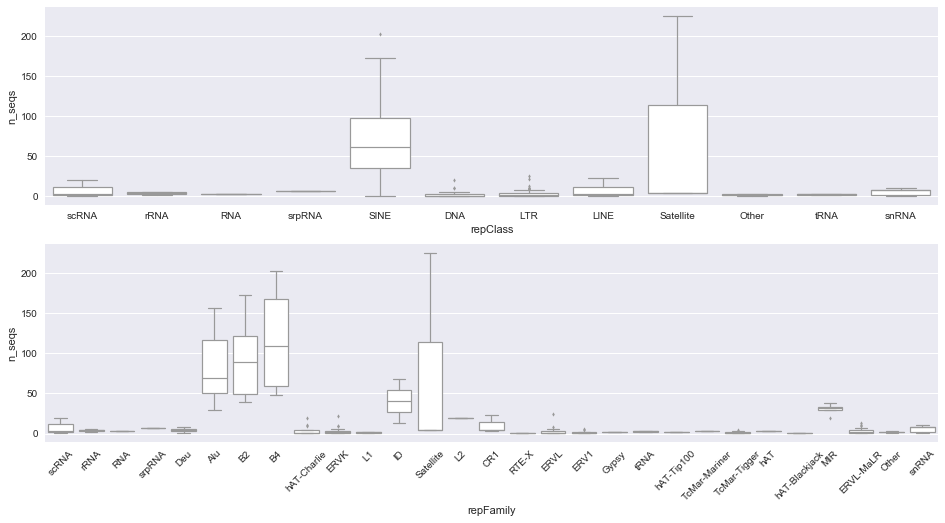

In [10]:
axes = plot_stats_boxplot('n_seqs')

(0, 300)

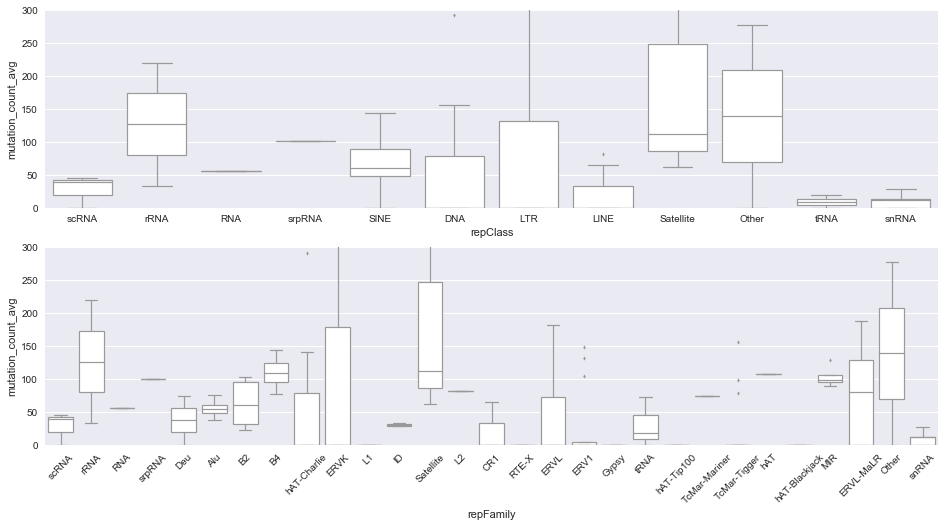

In [11]:
axes = plot_stats_boxplot('mutation_count_avg')
axes[0].set_ylim(0, 300)
axes[1].set_ylim(0, 300)

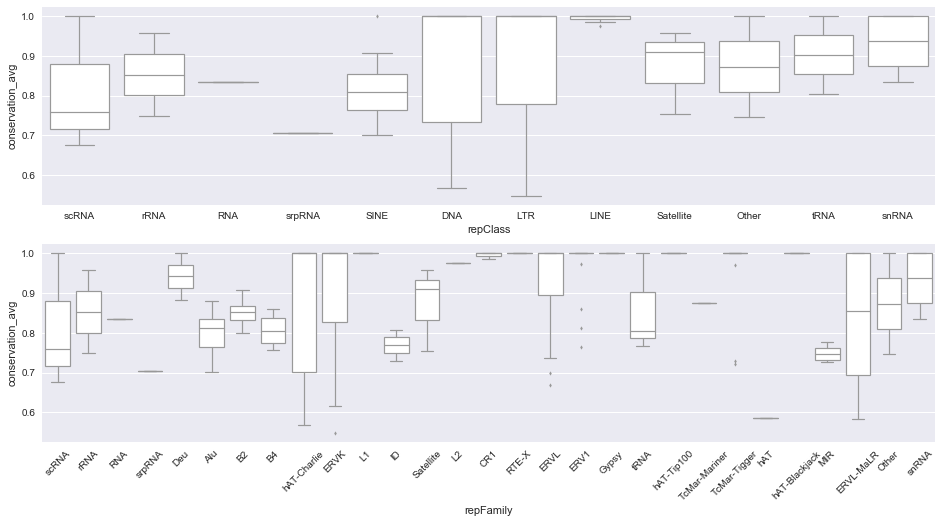

In [12]:
axes = plot_stats_boxplot('conservation_avg')

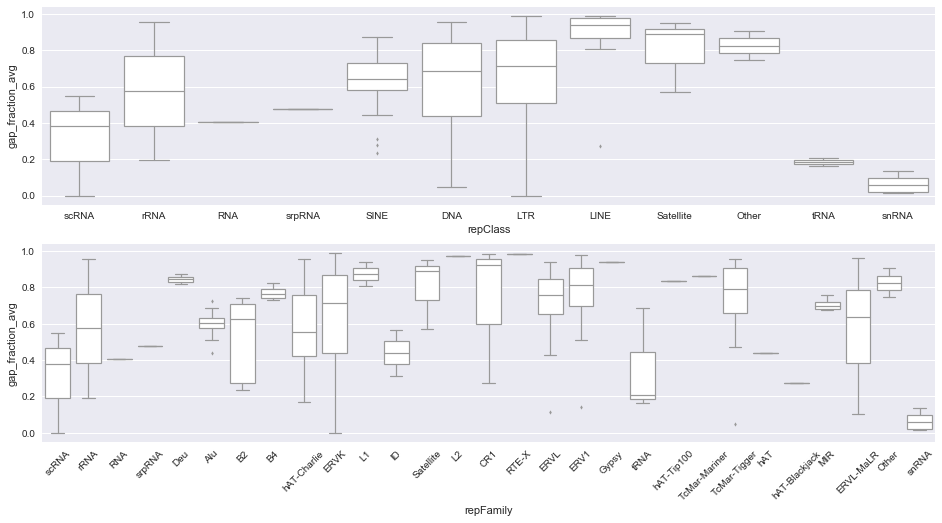

In [13]:
axes = plot_stats_boxplot('gap_fraction_avg')